In [1]:
"""
========================================================================
Illustration of Gaussian process classification (GPC) on the XOR dataset
========================================================================
This example illustrates GPC on XOR data. Compared are a stationary, isotropic
kernel (RBF) and a non-stationary kernel (DotProduct). On this particular
dataset, the DotProduct kernel obtains considerably better results because the
class-boundaries are linear and coincide with the coordinate axes. In general,
stationary kernels often obtain better results.
"""
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause



Illustration of Gaussian process classification (GPC) on the XOR dataset
This example illustrates GPC on XOR data. Compared are a stationary, isotropic
kernel (RBF) and a non-stationary kernel (DotProduct). On this particular
dataset, the DotProduct kernel obtains considerably better results because the
class-boundaries are linear and coincide with the coordinate axes. In general,
stationary kernels often obtain better results.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct


In [3]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

kernels = [1.0 * RBF(length_scale=1.0), 1.0 * DotProduct(sigma_0=1.0)**2]


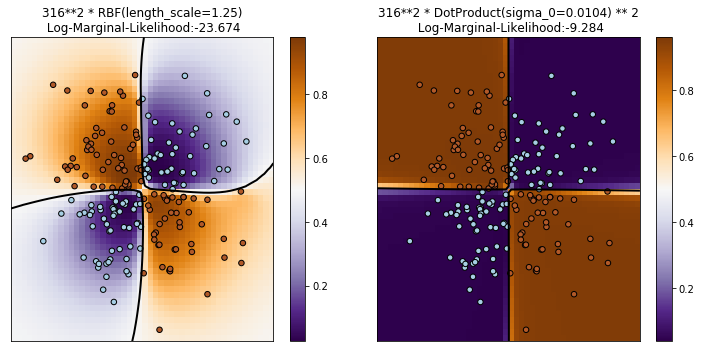

In [4]:

# fit the model
plt.figure(figsize=(10, 5))
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 2, i + 1)
    image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2,
                           colors=['k'])
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                edgecolors=(0, 0, 0))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title("%s\n Log-Marginal-Likelihood:%.3f"
              % (clf.kernel_, clf.log_marginal_likelihood(clf.kernel_.theta)),
              fontsize=12)

plt.tight_layout()
plt.show()